In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\iit delhi fsm\\Dataset\\kddcup.data_10_percent\\kddcup.data_10_percent")
df.head(20)

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,210,624,0,0,0,0,...,109,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.


In [4]:
df.shape

(494020, 42)

In [5]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [6]:
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df.rename(columns = {'0':'duration', 'tcp':'protocol_type', 'http':'service', 'SF':'flag', '181':'src_bytes', '5450':'dst_bytes', 
                     '0.1':'land', '0.2':'wrong_fragment', '0.3':'urgent', '0.4':'hot',
       '0.5':'num_failed_logins', '1':'logged_in', '0.6':'num_compromised', '0.7':'root_shell', '0.8':'su_attempted', '0.9':'num_root',
                     '0.10':'num_file_creations', '0.11':'num_shells', '0.12':'num_access_files', '0.13':'num_outbound_cmds',
       '0.14':'is_host_login', '0.15':'is_guest_login', '8':'count', '8.1':'srv_count', '0.00':'serror_rate', '0.00.1':'srv_serror_rate', '0.00.2':'rerror_rate', '0.00.3':'srv_rerror_rate',
       '1.00':'same_srv_rate', '0.00.4':'diff_srv_rate', '0.00.5':'srv_diff_host_rate', '9':'dst_host_count', '9.1':'dst_host_srv_count', '1.00.1':'dst_host_same_srv_rate', '0.00.6':'dst_host_diff_srv_rate', '0.11.1':'dst_host_same_src_port_rate',
       '0.00.7':'dst_host_srv_diff_host_rate', '0.00.8':'dst_host_serror_rate', '0.00.9':'dst_host_srv_serror_rate', '0.00.10':'dst_host_rerror_rate', '0.00.11':'dst_host_srv_rerror_rate', 'normal.':'normal'}, inplace = True)

In [8]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'normal'],
      dtype='object')

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,normal
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
protocol_type = df.loc[:,'protocol_type']
protocol_type = pd.DataFrame(protocol_type)

protocol_type

,protocol_type
0,tcp
1,tcp
2,tcp
3,tcp
4,tcp
...,...
494015,tcp
494016,tcp
494017,tcp
494018,tcp


<AxesSubplot:>

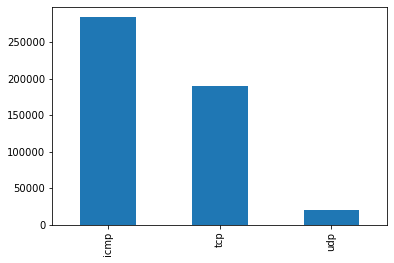

In [11]:
protocol_counts = protocol_type['protocol_type'].value_counts()
protocol_counts.plot.bar()

In [12]:
service_type = df.loc[:,'service']
service_type = pd.DataFrame(service_type)

service_type

,service
0,http
1,http
2,http
3,http
4,http
...,...
494015,http
494016,http
494017,http
494018,http


In [13]:
service_type['service'].unique()


array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [14]:
service_type['service'].nunique()

66

<AxesSubplot:>

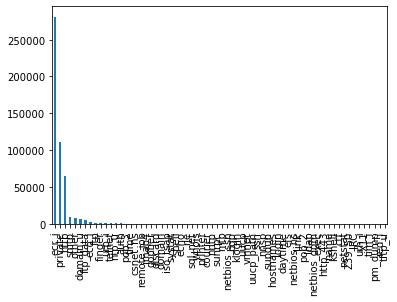

In [15]:
service_counts = service_type['service'].value_counts()
service_counts.plot.bar()

In [16]:
flag_type = df.loc[:,'flag']
flag_type = pd.DataFrame(flag_type)

flag_type

,flag
0,SF
1,SF
2,SF
3,SF
4,SF
...,...
494015,SF
494016,SF
494017,SF
494018,SF


In [17]:
flag_type['flag'].unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [18]:
flag_type['flag'].nunique()

11

In [19]:
flag_counts = flag_type['flag'].value_counts()
flag_counts

SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

<AxesSubplot:>

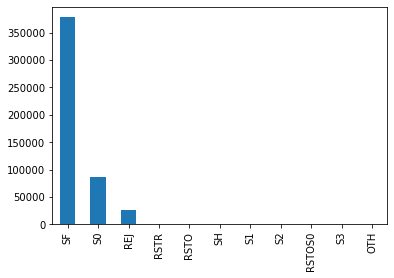

In [20]:
flag_counts.plot.bar()

In [21]:
normal_type = df.loc[:,'normal']
normal_type = pd.DataFrame(normal_type)

normal_type

,normal
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.
...,...
494015,normal.
494016,normal.
494017,normal.
494018,normal.


In [22]:
normal_type['normal'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [23]:
normal_type['normal'].nunique()

23

In [24]:
normal_counts = normal_type['normal'].value_counts()
normal_counts

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: normal, dtype: int64

<AxesSubplot:>

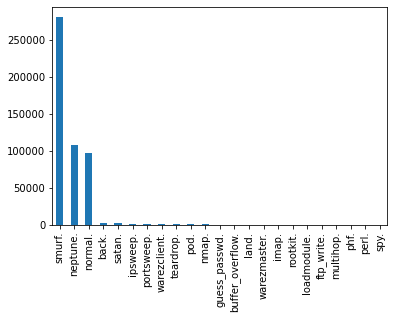

In [25]:
normal_counts.plot.bar()

In [26]:
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,normal
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,210,624,0,0,0,0,...,109,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.


In [27]:
df['land'].unique()

array([0, 1], dtype=int64)

In [28]:
land_counts = df['land'].value_counts()
land_counts

0    493998
1        22
Name: land, dtype: int64

In [29]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

df['Attack Type'] = df.normal.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,normal,Attack Type
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [30]:
attack_type = df.loc[:,'Attack Type']
attack_type = pd.DataFrame(attack_type)

attack_type

,Attack Type
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
494015,normal
494016,normal
494017,normal
494018,normal


In [31]:
attack_counts = attack_type['Attack Type'].value_counts()
attack_counts

dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

<AxesSubplot:>

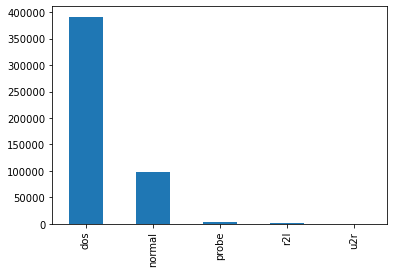

In [32]:
attack_counts.plot.bar()

In [33]:
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,normal,Attack Type
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
5,0,tcp,http,SF,212,1940,0,0,0,0,...,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,normal
6,0,tcp,http,SF,159,4087,0,0,0,0,...,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,normal
7,0,tcp,http,SF,210,151,0,0,0,0,...,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,normal
8,0,tcp,http,SF,212,786,0,0,0,1,...,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,normal
9,0,tcp,http,SF,210,624,0,0,0,0,...,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.,normal


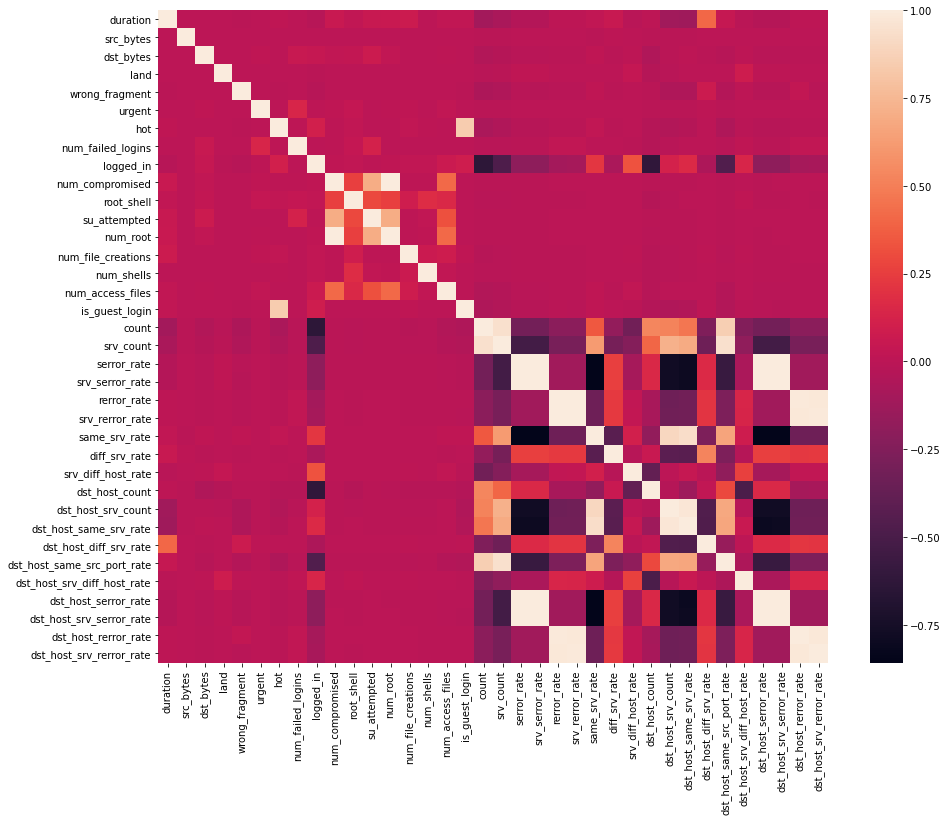

In [34]:
import seaborn as sns

df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [35]:
#now the columns with correlation nearly equal to 1 they will cause redundancy and hence one of them can be dropped 
#for example

df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615065604299

In [36]:
#as we can see the correlation is almost 1 
#meaning both the columns are almost same and are causing sam effect and hence one of them can be omitted 

#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [37]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,normal,Attack Type
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.0,normal.,normal


In [38]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [39]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [40]:
#flag feature mapping
fmap = {'http':0, 'smtp':1, 'finger':2, 'domain_u':3, 'auth':4, 'telnet':5, 'ftp':6,
       'eco_i':7, 'ntp_u':8, 'ecr_i':9, 'other':10, 'private':11, 'pop_3':12, 'ftp_data':13,
       'rje':14, 'time':15, 'mtp':16, 'link':17, 'remote_job':18, 'gopher':19, 'ssh':20,
       'name':21, 'whois':22, 'domain':23, 'login':24, 'imap4':25, 'daytime':26, 'ctf':27,
       'nntp':28, 'shell':29, 'IRC':30, 'nnsp':31, 'http_443':32, 'exec':33, 'printer':34,
       'efs':35, 'courier':36, 'uucp':37, 'klogin':38, 'kshell':39, 'echo':40, 'discard':41,
       'systat':42, 'supdup':43, 'iso_tsap':44, 'hostnames':45, 'csnet_ns':46, 'pop_2':47,
       'sunrpc':48, 'uucp_path':49, 'netbios_ns':50, 'netbios_ssn':51, 'netbios_dgm':52,
       'sql_net':53, 'vmnet':54, 'bgp':55, 'Z39_50':56, 'ldap':57, 'netstat':58, 'urh_i':59,
       'X11':60, 'urp_i':61, 'pm_dump':62, 'tftp_u':63, 'tim_i':64, 'red_i':65}
df['service'] = df['service'].map(fmap)

In [41]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,normal,Attack Type
0,0,1,0,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
1,0,1,0,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
2,0,1,0,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
3,0,1,0,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal
4,0,1,0,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.0,normal.,normal


In [42]:
df = df.drop(['normal'], axis=1)
print(df.shape)

(494020, 32)


In [43]:
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330993, 31) (163027, 31)
(330993, 1) (163027, 1)


In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)
Y_test_pred_knn = knn.predict(X_test)


<ipython-input-156-59744f05c92e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X,Y)


In [157]:
print("Train score is:", knn.score(X_train, Y_train))
print("Test score is:",knn.score(X_test,Y_test))

Train score is: 0.9993746091307066
Test score is: 0.9993988725793886


In [158]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(X_train, Y_train.values.ravel())

Y_test_pred1 = NB.predict(X_test)

print("Train score is:", NB.score(X_train, Y_train))
print("Test score is:",NB.score(X_test,Y_test))

Train score is: 0.8954388763508594
Test score is: 0.8959926883277003


In [159]:
from sklearn.tree import DecisionTreeClassifier


model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

model2.fit(X_train, Y_train.values.ravel())

Y_test_pred2 = model2.predict(X_test)

print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9958911517766237
Test score is: 0.9955528838781306


In [160]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)

model3.fit(X_train, Y_train.values.ravel())
Y_test_pred3 = model3.predict(X_test)

print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 1.0
Test score is: 0.9997791776822245


In [ ]:
from sklearn.svm import SVC

model4 = SVC(gamma = 'scale')

model4.fit(X_train, Y_train.values.ravel())
Y_test_pred4 = model4.predict(X_test)

print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression

model5.fit(X_train, Y_train.values.ravel())

Y_test_pred5 = model5.predict(X_test)

print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

model6 = GradientBoostingClassifier(random_state=0)

model6.fit(X_train, Y_train.values.ravel())

Y_test_pred6 = model6.predict(X_test)

print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9987310909898397
Test score is: 0.9987793432989628


In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model


In [47]:
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

model7.fit(X_train, Y_train.values.ravel())

Y_test_pred7 = model7.predict(X_test)

Y_train_pred7 = model7.predict(X_train)

accuracy_score(Y_train,Y_train_pred7)

accuracy_score(Y_test,Y_test_pred7)

<ipython-input-47-b8d30b843392>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)


Epoch 1/100


ValueError: in user code:

    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 30), found shape=(None, 31)
